## Replication for "Asymmetry by Design", July 19, 2021
### By Adam Goldstein and Charlie Eaton

### Figure 1: Boxplots over time for demographic, price, and faculty support

In [1]:
ssc install gr0070

In [2]:
copy "https://github.com/HigherEdData/asymmetry/raw/master/data/d_unitidasymmetry.dta" ///
    data/d_unitidasymmetry.dta, replace

copy "https://github.com/HigherEdData/asymmetry/raw/master/data/d_opeidasymmetry.dta" ///
    data/d_opeidasymmetry.dta, replace

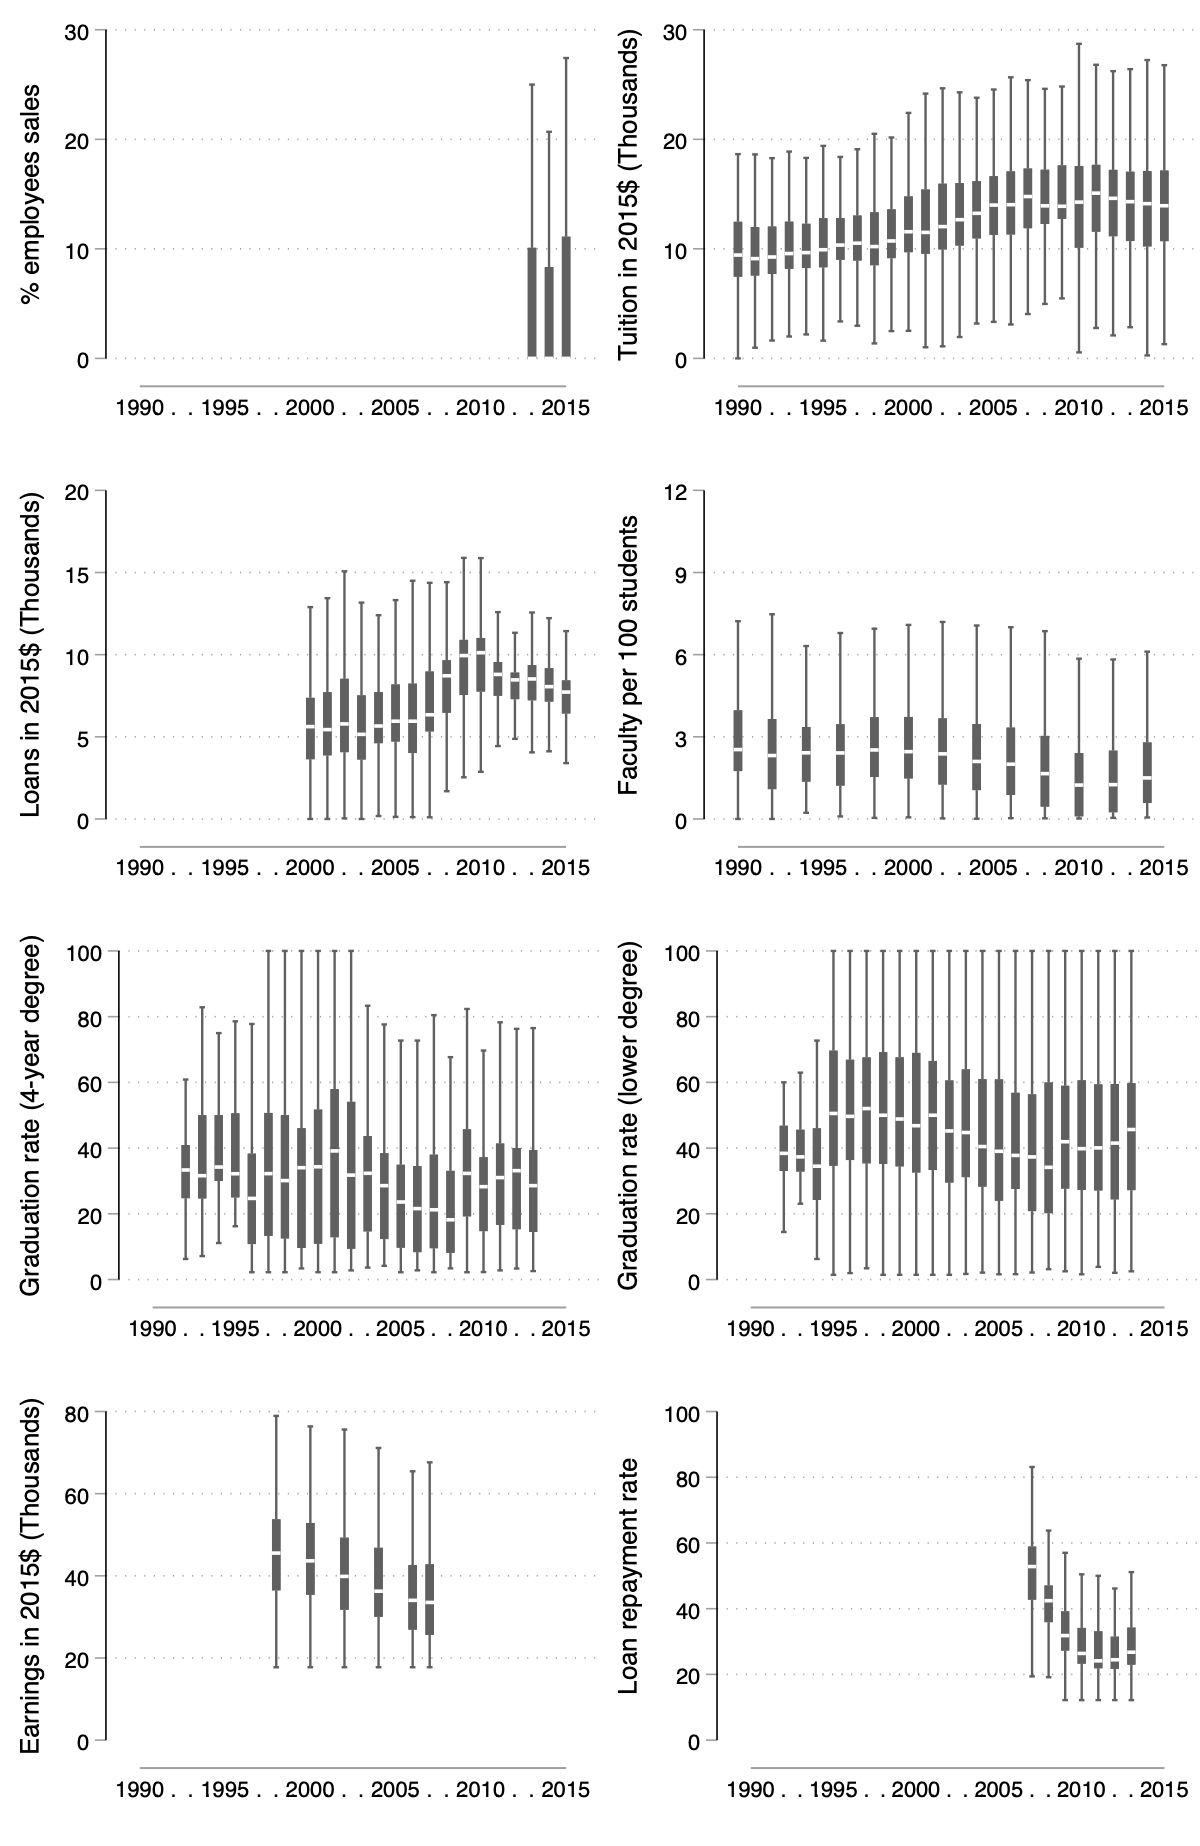

In [3]:
quietly {

set scheme plotplain
est clear

use data/d_unitidasymmetry, clear
drop if year<1990 | year>2015
gen odd = mod(year,2) 

replace ft_faculty_per_100fte=. if odd==1
    replace grad_rate_150_p2yr=. if year>2013

quietly gen fracsales= sftesale /sftetotl * 100

quietly label var fracsales "% employees sales"

*label drop year
label define year 1990 "1990" 1991 "." 1992 "." 1993 "." 1994 "." 1995 "1995" ///
1996 "." 1997 "." 1998 "." 1999 "." 2000 "2000" 2001 "." 2002 "." 2003 "." 2004 "." 2005 "2005" ///
2006 "." 2007 "." 2006 "." 2007 "." 2008 "." 2009  "." 2010 "2010" 2011 "." ///
2012 "." 2013 "." 2014 "." 2015 "2015"

label val year year
    
label var tuitionall_c "Tuition in 2015$ (Thousands)"
label var loan_amount_borrower_c "Loans in 2015$ (Thousands)"
label var ft_faculty_per_100fte "Faculty per 100 students"
label var grad_rate_150_p2yr "Graduation rate (lower degree)"
label var grad_rate_150_p4yr "Graduation rate (4-year degree)"

foreach var in tuitionall_c grad_rate_150_p4yr grad_rate_150_p2yr {

quietly graph box `var' [aweight=all_under], over(year) name(`var', replace) nooutsides note(" ")
    }
    
quietly graph box ft_faculty_per_100fte [aweight=all_under], ylab(0(3)12) over(year) name(ft_faculty_per_100fte, replace) nooutsides note(" ")

quietly graph box loan_amount_borrower_c [aweight=all_under], ylab(0(5)20) over(year) name(loan_amount_borrower_c, replace) nooutsides note(" ")

quietly graph box fracsales [aweight=all_under],  over(year) name(fracsales, replace) nooutsides note(" ")

use data/d_opeidasymmetry, clear
drop if multi_brand==.
drop if year<1990 | year>2015

label var rpy_3yr_rt_supp "Loan repayment rate"
label var mn_earn_wne_p6_c "Earnings in 2015$ (Thousands)"

label define year 1990 "1990" 1991 "." 1992 "." 1993 "." 1994 "." 1995 "1995" ///
1996 "." 1997 "." 1998 "." 1999 "." 2000 "2000" 2001 "." 2002 "." 2003 "." 2004 "." 2005 "2005" ///
2006 "." 2007 "." 2006 "." 2007 "." 2008 "." 2009  "." 2010 "2010" 2011 "." ///
2012 "." 2013 "." 2014 "." 2015 "2015"
label val year year
quietly graph box rpy_3yr_rt_supp [aweight=all_under], ylab(0(20)100) over(year) name(rpy_3yr_rt_supp, replace) nooutsides note(" ")
quietly graph box mn_earn_wne_p6_c [aweight=all_under], ylab(0(20)80) over(year) name(mn_earn_wne_p6_c, replace) nooutsides note(" ")

graph combine fracsales tuitionall_c loan_amount_borrower_c ft_faculty_per_100fte ///
grad_rate_150_p4yr  grad_rate_150_p2yr mn_earn_wne_p6_c rpy_3yr_rt_supp, cols(2) ///
xcommon xsize(6.5) ysize(10) graphregion(margin(zero)) imargin(zero) ///
name(outcomes, replace)
    
quietly graph export "figures/f1_predationboxplotsovertime.pdf", replace

}

In [4]:
quietly use data/d_unitidasymmetry, clear
sum grad_rate_150_p4yr if year==2013, detail




                        BA grad rate
-------------------------------------------------------------
      Percentiles      Smallest
 1%     4.761905       2.569833
 5%     8.695652       3.703704
10%     12.69231       4.761905       Obs                 216
25%     19.78637              5       Sum of wgt.         216

50%      30.5498                      Mean            37.7839
                        Largest       Std. dev.      24.89833
75%           50            100
90%           80            100       Variance       619.9267
95%          100            100       Skewness       1.047283
99%          100            100       Kurtosis       3.331331
